In [5]:

!pip install opencv-python
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

def plot_gallery(images, titles, h, w, n_rows=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_col))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [6]:
import os
import numpy as np
import cv2

# Directory containing face images
dir_name = "C:/Users/gaval/OneDrive/Desktop/faces"

y = []
X = []
target_names = []
class_names = []

person_id = 0
h, w = 300, 300
n_samples = 0

# Ensure the directory exists
if not os.path.exists(dir_name):
    print(f"Error: Directory '{dir_name}' does not exist!")
    exit()

# Loop through each person's folder
for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    
    # ✅ Skip if it's a file, not a directory
    if not os.path.isdir(dir_path):
        print(f"Skipping file: {dir_path}")
        continue

    class_names.append(person_name)

    # Loop through each image in the person's folder
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)

        # Read image
        img = cv2.imread(image_path)
        if img is None:
            print(f"Warning: Skipping unreadable image {image_path}")
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize image
        resized_image = cv2.resize(gray, (h, w))

        # Flatten the image into a 1D array
        v = resized_image.flatten()
        X.append(v)
        y.append(person_id)
        target_names.append(person_name)

        n_samples += 1

    person_id += 1  # Increment person_id after processing all images of the person

# Ensure at least one image was processed
if len(X) == 0:
    print("Error: No valid images found!")
    exit()

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)
target_names = np.array(target_names)

# Get dataset info
n_features = X.shape[1] if len(X) > 0 else 0
n_classes = len(class_names)

# Print dataset statistics
print(f"Dataset Size:")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")


Skipping file: C:/Users/gaval/OneDrive/Desktop/faces\1.jpg
Skipping file: C:/Users/gaval/OneDrive/Desktop/faces\2.webp
Skipping file: C:/Users/gaval/OneDrive/Desktop/faces\3.jpg
Skipping file: C:/Users/gaval/OneDrive/Desktop/faces\4.webp
Skipping file: C:/Users/gaval/OneDrive/Desktop/faces\5.jpg
Skipping file: C:/Users/gaval/OneDrive/Desktop/faces\6.jpg
Error: No valid images found!
Dataset Size:
n_samples: 0
n_features: 0
n_classes: 0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

# Load the dataset

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = faces.data  # Feature matrix
y = faces.target  # Labels
h, w = faces.images.shape[1:3]  # Image height and width

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

n_components = 150
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

# PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(X_train)

# Reshaping eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

# Function to plot the eigenfaces (assuming you have it defined)
# plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape, X_test_pca.shape)

# Applying LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

# Fixing typo: `trnsform` → `transform`
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

print("Project done...")


Iteration 1, loss = 2.23223478
Iteration 2, loss = 2.16530927
Iteration 3, loss = 2.10324373
Iteration 4, loss = 2.04476281
Iteration 5, loss = 1.98855950
Iteration 6, loss = 1.93636111
Iteration 7, loss = 1.88734877
Iteration 8, loss = 1.84113502
Iteration 9, loss = 1.79643499
Iteration 10, loss = 1.75375145
Iteration 11, loss = 1.71398359
Iteration 12, loss = 1.67450984
Iteration 13, loss = 1.63655563
Iteration 14, loss = 1.59943298
Iteration 15, loss = 1.56348197
Iteration 16, loss = 1.52749742
Iteration 17, loss = 1.49194763
Iteration 18, loss = 1.45755100
Iteration 19, loss = 1.42353024
Iteration 20, loss = 1.38933248
Iteration 21, loss = 1.35633812
Iteration 22, loss = 1.32414515
Iteration 23, loss = 1.29273296
Iteration 24, loss = 1.26199459
Iteration 25, loss = 1.23147195
Iteration 26, loss = 1.20166565
Iteration 27, loss = 1.17250298
Iteration 28, loss = 1.14387041
Iteration 29, loss = 1.11573476
Iteration 30, loss = 1.08784569
Iteration 31, loss = 1.06010503
Iteration 32, los

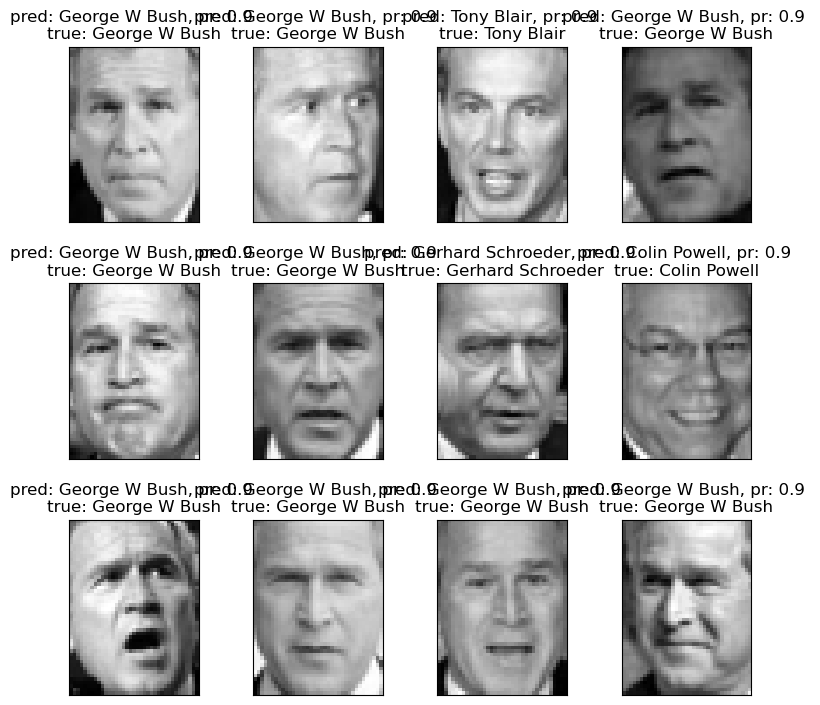

In [9]:
from sklearn.neural_network import MLPClassifier

# Define the classifier
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=1000, verbose=True)

# Fit the model
clf.fit(X_train_lda, y_train)

# Print model weights
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

######################################
import matplotlib.pyplot as plt

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i in range(n_row * n_col):
        if i >= len(images):  # Avoid index error if fewer images than slots
            break
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

    plt.show()

##################################################
plot_gallery(X_test,prediction_titles, h, w)
plt.show()


Final Accuracy: 82.9192546583851


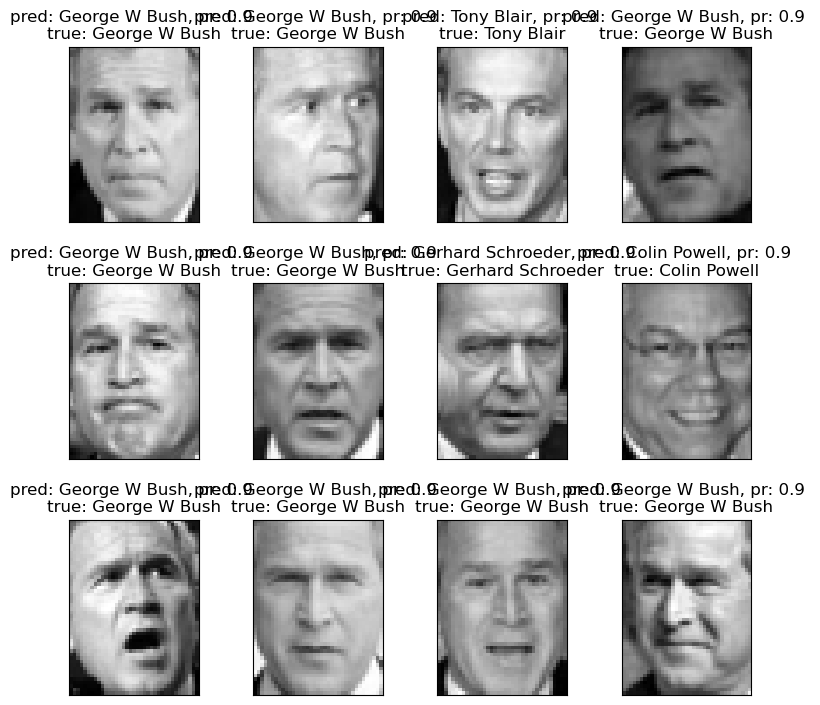

In [7]:
from sklearn.datasets import fetch_lfw_people

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
#dir_name = "C:/Users/gaval/OneDrive/Desktop/faces"
#lfw_people = dir_name
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

# Define class_names from target_names
class_names = target_names




#####################################
import numpy as np
import matplotlib.pyplot as plt

y_pred = []
y_prob = []
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.where(prob == np.max(prob))[0][0]
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

y_pred = np.array(y_pred)
prediction_titles = []
true_positive = 0

for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive += 1

accuracy = true_positive * 100 / y_pred.shape[0]
print("Final Accuracy:", accuracy)
##############################################################
import matplotlib.pyplot as plt

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i in range(n_row * n_col):
        if i >= len(images):  # Avoid index error if fewer images than slots
            break
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

    plt.show()

##################################################
plot_gallery(X_test, prediction_titles, h, w)
plt.show()
